<a href="https://colab.research.google.com/github/rgspatial/Practicing/blob/main/TF2_0_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
# Load Data

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print('x_train.shape:', x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# data is 2D, convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
# number of classes
K = len(set(y_train))
print(f'number of classes: {K}')

number of classes: 10


In [5]:
# build model using functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model=Model(i,x)

In [7]:
# compile and fit (suggest using GPU)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Epoch 1/15
1875/1875 [==============================] - 15s 4ms/step - loss: 0.5214 - accuracy: 0.8069 - val_loss: 0.4089 - val_accuracy: 0.8471
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3681 - accuracy: 0.8619 - val_loss: 0.3567 - val_accuracy: 0.8611
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3166 - accuracy: 0.8805 - val_loss: 0.3199 - val_accuracy: 0.8811
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2780 - accuracy: 0.8942 - val_loss: 0.3251 - val_accuracy: 0.8803
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2558 - accuracy: 0.9034 - val_loss: 0.3043 - val_accuracy: 0.8907
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2834 - val_accuracy: 0.9005
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2154 - accuracy: 0.9180 - val_loss: 0.2833 - val_accuracy

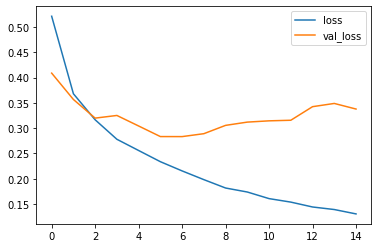

In [8]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [9]:
# looks like some slight overfitting since test val_loss going up a bit

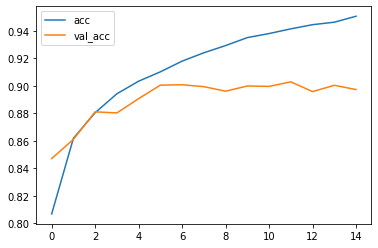

In [10]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Blues):

# '''This function plots the confusion matrix.
# Normalization can be applied by setting to True.
# '''

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('normalized confusion matrix')
  else:
    print('confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
           horizontalalignment='center',
           color='white' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

313/313 [==============================] - 1s 3ms/step
confusion matrix, without normalization
[[853   2  24  17   2   1  95   0   6   0]
 [  2 975   0  13   2   0   4   0   4   0]
 [ 12   1 890   9  24   1  59   0   4   0]
 [ 11   8  22 905  21   0  32   0   1   0]
 [  0   3 112  29 756   0  98   0   2   0]
 [  1   0   0   1   0 980   0  11   1   6]
 [104   0  87  22  58   0 719   0  10   0]
 [  0   0   0   0   0  16   0 942   0  42]
 [  1   2   6   3   0   2   4   1 981   0]
 [  1   0   0   0   0   5   0  22   0 972]]


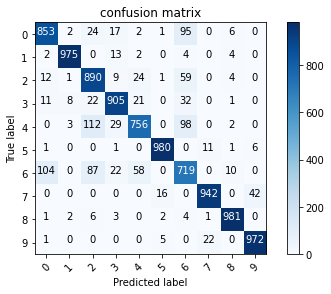

In [12]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)))

In [13]:
# label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

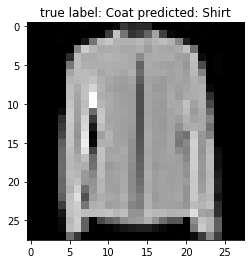

In [18]:
# show misclassified
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("true label: %s predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));